In [2]:
import matplotlib.pyplot as plt
from subprocess import check_output
import pandas as pd
from io import StringIO

img_path = 'PageLayoutAnalysisICDAR2-0.jpeg'

image = plt.imread(img_path)


In [3]:
# run tesseract
out = StringIO(check_output(['tesseract', img_path, "-", "-l", "eng", "tsv"]).decode('utf-8'))

df = pd.read_table(out, sep='\t')

Estimating resolution as 355


In [4]:
print(df[(df['conf'] == 95 )& (df['width'] > 10) & (df['height'] > 10)])



     level  page_num  block_num  par_num  line_num  word_num  left   top  \
702      5         1         12        1         1         1  1840  1900   

     width  height  conf text  
702    403     529  95.0       


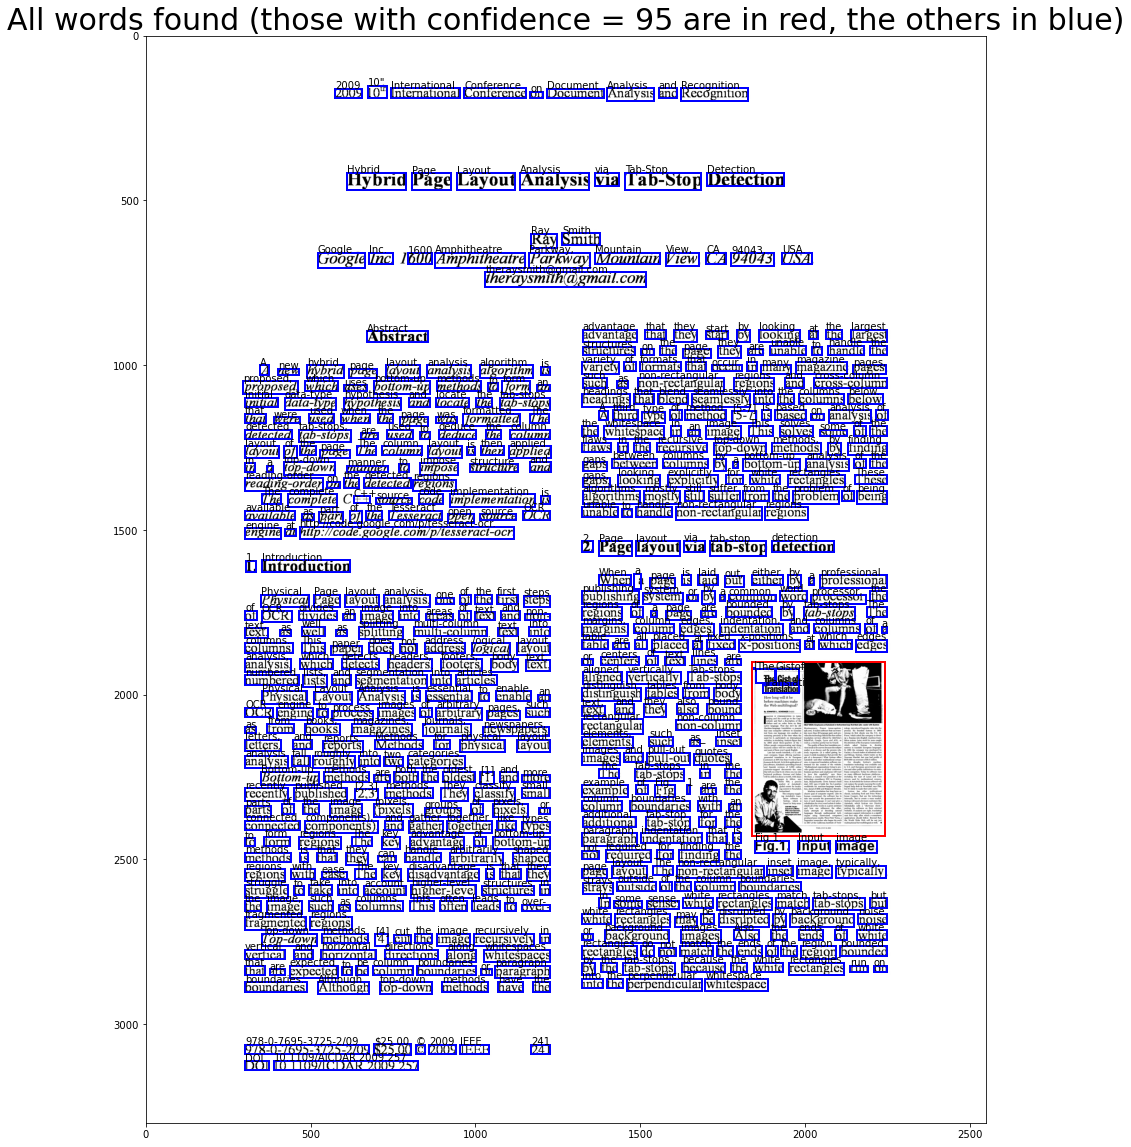

In [7]:
images = df[(df['level'] == 5)]


fig, ax = plt.subplots(figsize=(20, 20))
ax.imshow(image)

for _, row in images.iterrows():
    ax.text(row['left'], row['top'], row['text'], fontsize=10)
    ax.add_patch(plt.Rectangle((row['left'], row['top']), row['width'], row['height'], fill=False, edgecolor=('blue' if row['conf'] != 95 else 'red'), linewidth=2))

plt.title('All words found (those with confidence = 95 are in red, the others in blue)', fontsize=30)

plt.show()


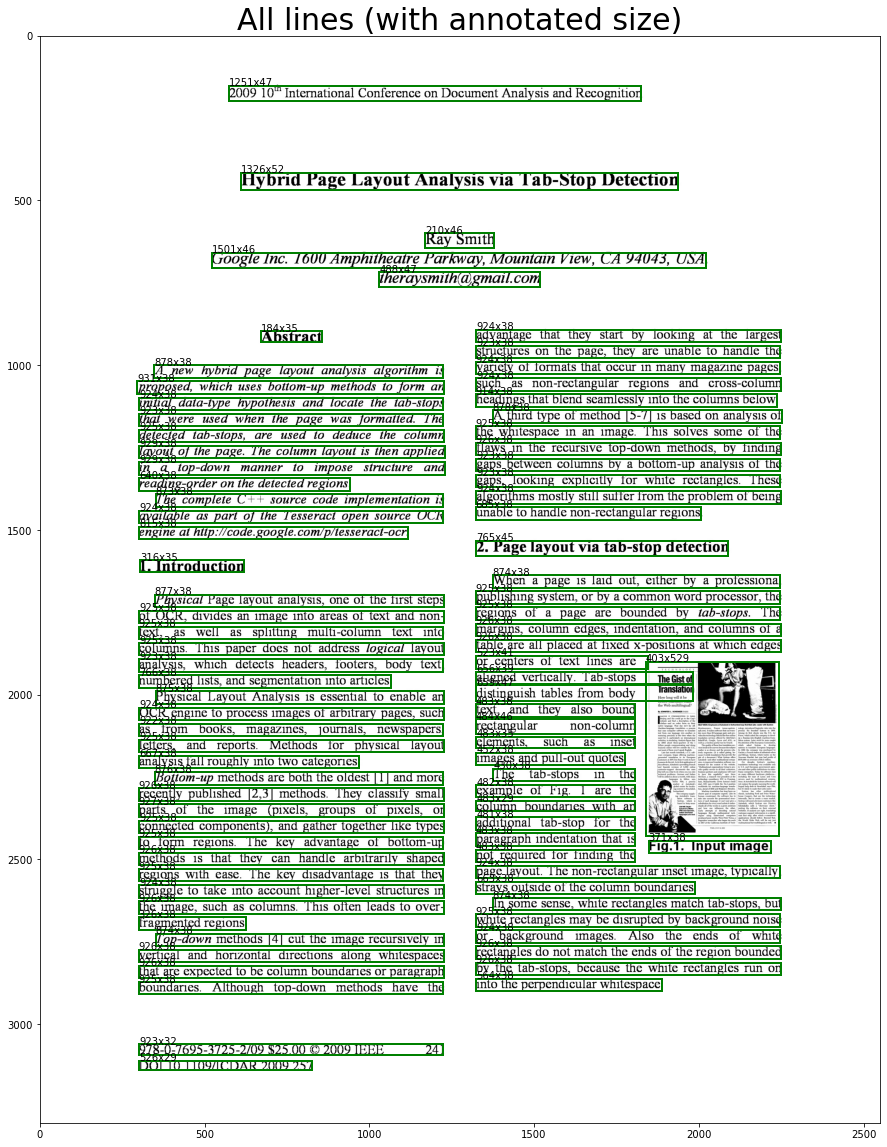

In [10]:
images = df[(df['level'] == 4)]


fig, ax = plt.subplots(figsize=(20, 20))
ax.imshow(image)

for _, row in images.iterrows():
    ax.text(row['left'], row['top'], "{}x{}".format(row['width'], row['height']), fontsize=10)
    ax.add_patch(plt.Rectangle((row['left'], row['top']), row['width'], row['height'], fill=False, edgecolor='green', linewidth=2))

plt.title('All lines (with annotated size)', fontsize=30)

plt.show()


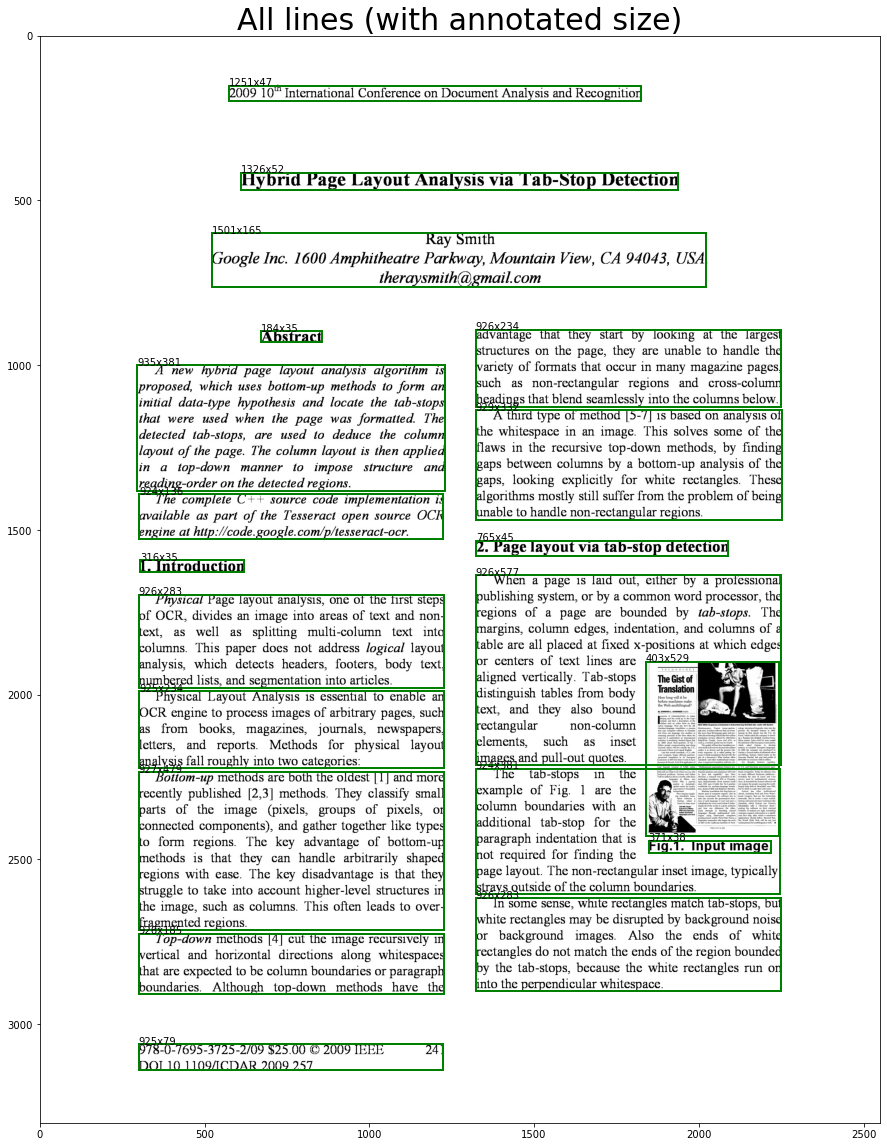

In [11]:
images = df[(df['level'] == 3)]


fig, ax = plt.subplots(figsize=(20, 20))
ax.imshow(image)

for _, row in images.iterrows():
    ax.text(row['left'], row['top'], "{}x{}".format(row['width'], row['height']), fontsize=10)
    ax.add_patch(plt.Rectangle((row['left'], row['top']), row['width'], row['height'], fill=False, edgecolor='green', linewidth=2))

plt.title('All paragraphs (with annotated size)', fontsize=30)

plt.show()


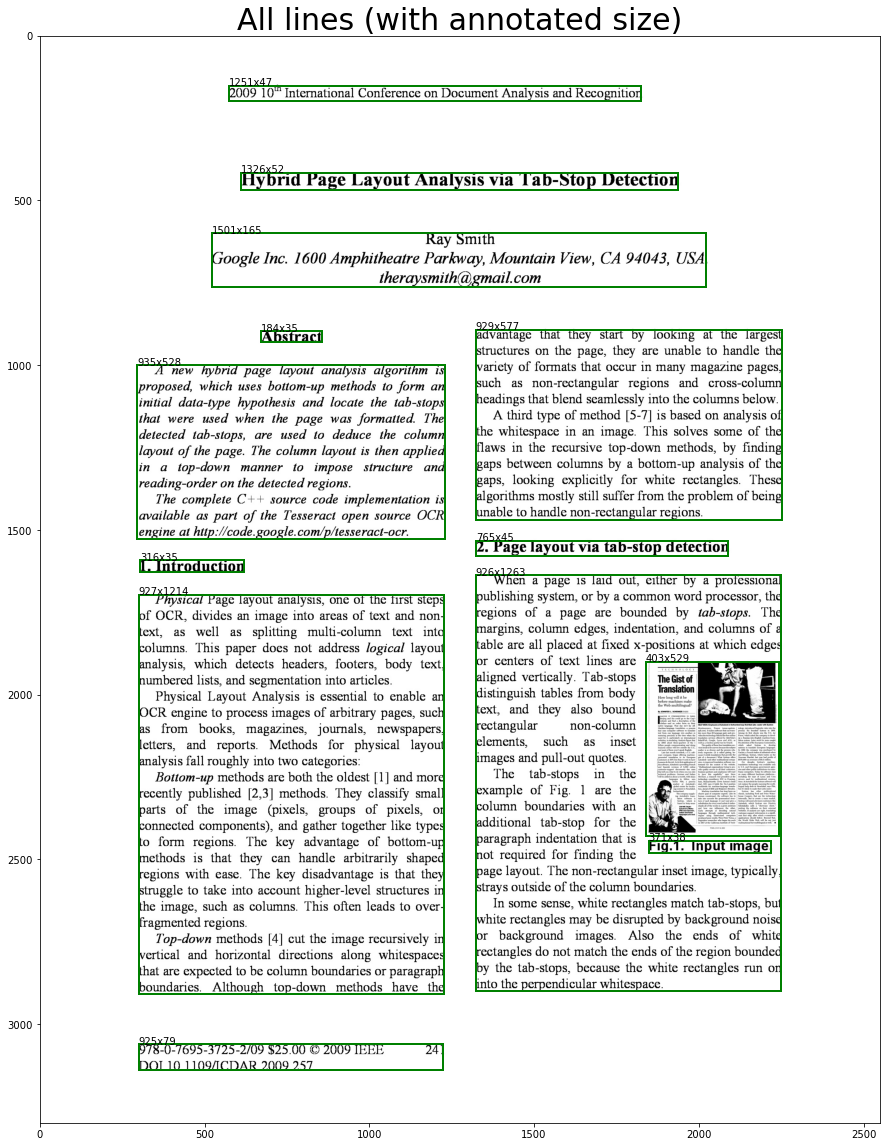

In [12]:
images = df[(df['level'] == 2)]


fig, ax = plt.subplots(figsize=(20, 20))
ax.imshow(image)

for _, row in images.iterrows():
    ax.text(row['left'], row['top'], "{}x{}".format(row['width'], row['height']), fontsize=10)
    ax.add_patch(plt.Rectangle((row['left'], row['top']), row['width'], row['height'], fill=False, edgecolor='green', linewidth=2))

plt.title('All blocks (with annotated size)', fontsize=30)

plt.show()
